############################################################################################

################## -- Programa de Especialización en Data Science Nivel II --##########################

############################################################################################

Modelos de Clasificación : Redes Neuronales Artificiales

Autores : José Cárdenas - André Chávez 

## Guía de Modelamiento de Información

#### 1 LIBRERÍAS A UTILIZAR

In [1]:
# Primer Curso de ML
#Importar las librerías necesarias en Python.
import pandas as pd ## Manejo de dataframes o set de datos
%matplotlib inline
import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas y demás.
import matplotlib as plt
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.

#### 2 EXTRAYENDO LA DATA

In [2]:
train = pd.read_csv("C:/Users/Andre Chavez/Desktop/Datos/train.csv") 
# Leer el dataset en un dataframe usando pandas

In [4]:
#Leer los primeros registros.
train.head(2) # Puedes visualizar la cantidad de registro que requieras

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


#### 4 IMPUTACION DE LA DATA

In [5]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train.apply(num_missing, axis=0)) # Axis = 0 es vertical , axis =1 horizontal.

Valores perdidos por columna
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
# Particionando la data en Numéricos (Variables Cuantitativas) y Factores (Variables Cualitativas)

In [6]:
# Recodificando y convirtiendo las variables de acuerdo a nuestro criterio
# Data de Entrenamiento
#train = pd.read_csv("C:/Users/Andre Chavez/Desktop/DictadodeCursos/Machine Learning for Data Science-URP/DataSet/Aprendizaje Supervisado/train.csv") # Leer el dataset en un dataframe usando pandas
train['Dependents'] = train['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
train['Gender'] = train['Gender'].replace({'Female': 1,'Male': 2})
train['Married'] = train['Married'].replace({'No': 1,'Yes': 2})
train['Self_Employed'] = train['Self_Employed'].replace({'No': 1,'Yes': 2})
train['Education'] = train['Education'].replace({'Graduate': 1,'Not Graduate': 2})
train['Credit_History'] = train['Credit_History'].replace({0: 1,1: 2})
train['Property_Area'] = train['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})
train['Loan_Status'] = train['Loan_Status'].replace({'N': 0,'Y': 1})

In [7]:
# Recodificando y convirtiendo las variables de acuerdo a nuestro criterio
# Data de Test
test = pd.read_csv("C:/Users/Andre Chavez/Desktop/Datos/test.csv") # Leer el dataset en un dataframe usando pandas
test['Dependents'] = test['Dependents'].replace({'0': 1,'1': 2, '2': 3, '3+': 4})
test['Gender'] = test['Gender'].replace({'Female': 1,'Male': 2})
test['Married'] = test['Married'].replace({'No': 1,'Yes': 2})
test['Self_Employed'] = test['Self_Employed'].replace({'No': 1,'Yes': 2})
test['Education'] = test['Education'].replace({'Graduate': 1,'Not Graduate': 2})
test['Credit_History'] = test['Credit_History'].replace({0: 1,1: 2})
test['Property_Area'] = test['Property_Area'].replace({'Rural': 1, 'Semiurban': 2, 'Urban': 3})

In [8]:
# Creamos un copia del dataset original para poder realizar las imputaciones
# Imputacion del Data train
train_parametrica=train.copy()
train_parametrica.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,2.0,1.0,1.0,1,1.0,5849,0.0,NaN,360.0,2.0,3,1
1,LP001003,2.0,2.0,2.0,1,1.0,4583,1508.0,128.0,360.0,2.0,1,0


In [9]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mode()[0])

# Imputamos por las moda todas las variables cuantitativas

for column in ['LoanAmount', 'Loan_Amount_Term']:
    train_parametrica[column] = train_parametrica[column].fillna(train_parametrica[column].mean())    

In [10]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())

#Aplicamos por columna:
print ("Valores perdidos por columna")
print (train_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [11]:
# Imputacion del Data Test
test_parametrica=test.copy()
test_parametrica.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,2.0,2,1.0,1,1.0,5720,0,110.0,360.0,2.0,3
1,LP001022,2.0,2,2.0,1,1.0,3076,1500,126.0,360.0,2.0,3


In [12]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [13]:
# Imputación Paramétrica
# Para variables cuantitativas se puede usar medias o medianas, para las cualitativas moda.
# Imputamos por las moda todas las variables cualitativas
from scipy.stats import mode

for column in ['Gender', 'Married', 'Self_Employed', 'Credit_History','Dependents']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].mode()[0])
    
# Imputamos por las moda todas las variables cuantitativas
for column in ['LoanAmount', 'Loan_Amount_Term']:
    test_parametrica[column] = test_parametrica[column].fillna(test_parametrica[column].median())  

In [14]:
# Revisar los valores perdidos
#Creamos una función:
def num_missing(x):
  return sum(x.isnull())
#Aplicamos por columna:
print ("Valores perdidos por columna")
print (test_parametrica.apply(num_missing, axis=0)) 

Valores perdidos por columna
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


#### 5 CREACION Y TRANSFORMACION DE VARIABLES

##### Creación de Variables Paramétricamente o por Decisión de Negocio

In [ ]:
# También conocido como proceso de Feature Engineering, no olvidar que todo lo que le hacemos al Train o Entrenamiento se lo
# debemos hacer a la data de test.

In [15]:
#Creación de variables a partir de las definidas
import numpy as np
import pandas as pd

#Creamos las variables para el entrenamiento o train
train_parametrica['TotalIncome'] = train_parametrica['ApplicantIncome'] + train_parametrica['CoapplicantIncome']
train_parametrica['LoanAmount_Log'] = round(np.log(train_parametrica['LoanAmount']),2)
train_parametrica['AmountxTerm']=round(train_parametrica['LoanAmount']/train_parametrica['Loan_Amount_Term'],2)

#Creamos las variables para la validación o test


test_parametrica['TotalIncome'] = test_parametrica['ApplicantIncome'] + test_parametrica['CoapplicantIncome']
test_parametrica['LoanAmount_Log'] = round(np.log(test_parametrica['LoanAmount']),2)
test_parametrica['AmountxTerm']=round(test_parametrica['LoanAmount']/test_parametrica['Loan_Amount_Term'],2)


In [18]:
# Revisamos las variables creadas, derrepente queremos crear algunas más?
test_parametrica.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_Log,AmountxTerm
0,LP001015,2.0,2,1.0,1,1.0,5720,0,110.0,360.0,2.0,3,5720,4.70,0.31
1,LP001022,2.0,2,2.0,1,1.0,3076,1500,126.0,360.0,2.0,3,4576,4.84,0.35


In [19]:
# Le quitamos la variable Loan_ID o identificador único para poder modelar la información 
train_parametrica = train_parametrica.drop('Loan_ID', axis=1)

In [20]:
# Partición Muestral de la Información
# Creación de la data de train y la data de test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_parametrica.drop('Loan_Status', axis=1), 
                                                    train_parametrica['Loan_Status'], test_size=0.30,
                                                    stratify=train_parametrica['Loan_Status'],
                                                   random_state=100)

In [ ]:
# Puedo modelar la información sin balancear, sin embargo es necesario seleccionar las mejores variables

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

In [22]:
X_train.shape

(429, 14)

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


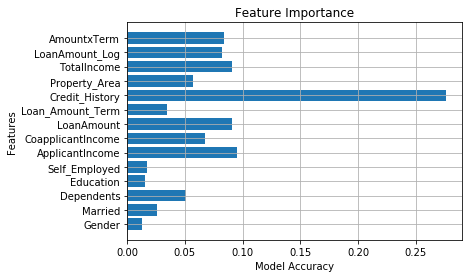

In [41]:
# Ajustar un modelo de Machine Learning y verificar las variables más importantes
extree = ExtraTreesClassifier()
extree.fit(X_train, y_train)

# Muestra la importancia relativa del clasificador
relval = extree.feature_importances_
# Creamos un gráfico para visualizar las variables
pos = np.arange(14) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, X_train.columns)
plt.grid(True)

In [ ]:
# Puedo modelar la información después de elegir las mejores variables !!!!

In [24]:
# Concatenamos las covariables y la variable dependiente del train para poder balancearlo
train_Xy = pd.concat([X_train, y_train], axis=1)

In [25]:
# Puedo corroborar que en mi data de train sigo teniendo el desbalance
train_Xy.Loan_Status.value_counts()

1    295
0    134
Name: Loan_Status, dtype: int64

#### 6 BALANCEO DE LOS DATOS Y SELECCIÓN DE DRIVERS

## Remuestreo

Una técnica ampliamente adoptada para tratar conjuntos de datos altamente desequilibrados se llama remuestreo. Consiste en eliminar muestras de la clase mayoritaria (submuestreo o undersampling) y / o agregar más ejemplos de la clase minoritaria (sobremuestreo o oversampling).



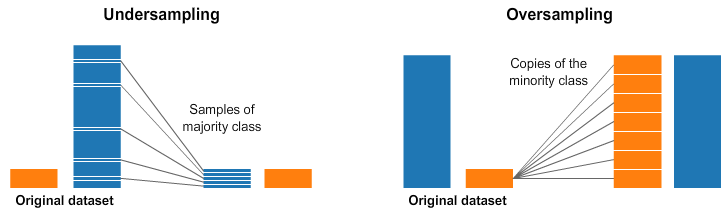

In [26]:
train_Xy.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,LoanAmount_Log,AmountxTerm,Loan_Status
544,1.0,2.0,1.0,2,1.0,3017,663.0,102.0,360.0,2.0,2,3680.0,4.62,0.28,1
13,2.0,1.0,1.0,1,1.0,1853,2840.0,114.0,360.0,2.0,1,4693.0,4.74,0.32,0
383,2.0,1.0,1.0,1,2.0,7167,0.0,128.0,360.0,2.0,3,7167.0,4.85,0.36,1


Clase 0: 134
Clase 1: 295
Proportion Clase 0: 0.31 : 0
Proportion Clase 1: 0.69 : 1


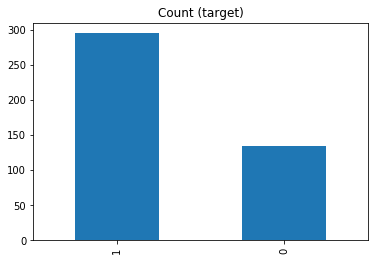

In [27]:
## Podemos hacer el balanceo de manera artesanal , para entender las lógicas.

import numpy as np
import pandas as pd
import seaborn as sns

target_count = train_Xy.Loan_Status.value_counts()
print('Clase 0:', target_count[0])
print('Clase 1:', target_count[1])

print('Proportion Clase 0:', round(target_count[0] / (target_count[0]+target_count[1]), 2), ': 0')
print('Proportion Clase 1:', round(target_count[1] / (target_count[0]+target_count[1]), 2), ': 1')


target_count.plot(kind='bar', title='Count (target)');



In [28]:
# Conteo de las Clases
# La clase 1 es la de los préstamos otorgados , tenemos 422 préstamos otorgados
# La clase 0 es la de los préstamos no otorgados , tenemos 192 préstamos no otorgados
count_class_1,count_class_0 = train_Xy.Loan_Status.value_counts()

# Dividimos las Clases
df_class_0 = train_Xy[train_Xy['Loan_Status'] == 0]
df_class_1 = train_Xy[train_Xy['Loan_Status'] == 1]

## Podemos visualizar el contenido del objeto df_class_1.head(5)

#### Undersampling o sub-muestreo

Random under-sampling:
1    134
0    134
Name: Loan_Status, dtype: int64


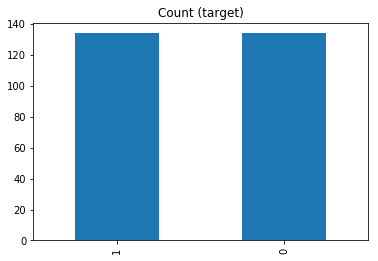

In [29]:
# Definimos una nueva variable llamada df_class_1_under la cual nos da un muestreo de la clase 1 dependiendo del número de 
# elementos de la clase 0.
df_class_1_under = df_class_1.sample(count_class_0)
df_balanceado_under = pd.concat([df_class_1_under, df_class_0], axis=0)

print('Random under-sampling:')
print(df_balanceado_under.Loan_Status.value_counts())

df_balanceado_under.Loan_Status.value_counts().plot(kind='bar', title='Count (target)');

#### Oversampling o sobre-muestreo

Random over-sampling:
1    295
0    295
Name: Loan_Status, dtype: int64


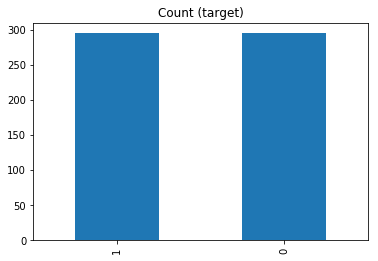

In [30]:
# Leemos la lógica : Del dataset de la clase 0 , sacamos una muestra de tamaño 422 con reemplazo.
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_balanceado_over = pd.concat([df_class_1, df_class_0_over], axis=0)

print('Random over-sampling:')
print(df_balanceado_over.Loan_Status.value_counts())

df_balanceado_over.Loan_Status.value_counts().plot(kind='bar', title='Count (target)');


### Métodos de Balanceo Sofisticados

#### RandomUnderSampling

In [31]:
# Creamos nuestra matriz de datos o variables independientes y 
# nuestro vector columna con la variable independiente
X, y = train_Xy.drop('Loan_Status', axis=1), train_Xy['Loan_Status']


In [32]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

df_X_rus = pd.DataFrame(data=X_rus,columns=X.columns)
df_y_rus = pd.DataFrame(data=y_rus,columns=['Loan_Status'])

# Concatenamos la información
df_balanceado_rus = pd.concat([df_X_rus, df_y_rus], axis=1)

In [ ]:
#df_balanceado_rus.head(10)
#df_balanceado_rus.describe()
#df_balanceado_rus.Loan_Status.value_counts()

#### RandomOverSampling

In [33]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

df_X_ros = pd.DataFrame(data=X_ros,columns=X.columns)
df_y_ros = pd.DataFrame(data=y_ros,columns=['Loan_Status'])

# Concatenamos la información
df_balanceado_ros = pd.concat([df_X_ros, df_y_ros], axis=1)

In [ ]:
#df_balanceado_ros.head(2)
#df_balanceado_ros.describe()
#df_balanceado_ros.Loan_Status.value_counts()

#### Imputación TomekLink

La imputación TomekLink son pares de instancias muy cercanas, pero de clases opuestas. Eliminar las instancias de la clase mayoritaria de cada par aumenta el espacio entre las dos clases, lo que facilita el proceso de clasificación.

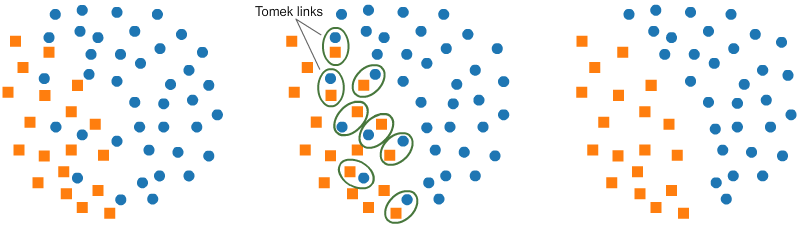

In [34]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl,id_tl  = tl.fit_sample(X, y)

df_X_tl = pd.DataFrame(data=X_tl,columns=X.columns)
df_y_tl = pd.DataFrame(data=y_tl,columns=['Loan_Status'])

# Concatenamos la información
df_balanceado_tl = pd.concat([df_X_tl, df_y_tl], axis=1)

In [ ]:
#df_balanceado_tl.head(3)
#df_balanceado_tl.describe()
#df_balanceado_tl.Loan_Status.value_counts()

### Imputación UnderSampling: Centros de Conglomerados

Esta técnica realiza submuestreo generando centroides basados en métodos de agrupamiento. Los datos se agruparán previamente por similitud, a fin de preservar la información.

En este ejemplo, pasaremos el dict {1: 192} para la relación de parámetros, para preservar 192 elementos de la clase mayoritaria (1) y todos los elementos de la clase minoritaria (0).

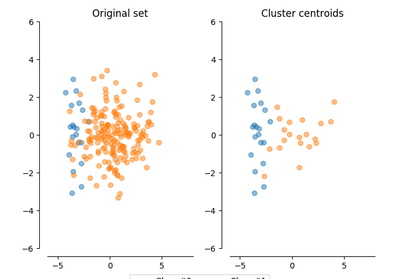

In [35]:
import numpy as np
import pandas as pd
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={1: 192})
X_cc, y_cc = cc.fit_sample(X, y)

df_X_cc = pd.DataFrame(data=X_cc,columns=X.columns)
df_y_cc = pd.DataFrame(data=y_cc,columns=['Loan_Status'])

# Concatenamos la información
df_balanceado_cc = pd.concat([df_X_cc, df_y_cc], axis=1)

In [ ]:
#df_balanceado_cc.head(2)
#df_balanceado_cc.describe()
#df_balanceado_cc.Loan_Status.value_counts()

### Imputación OverSampling: SMOTE

SMOTE (Técnica de sobremuestreo de Minorías Sintéticas) consiste en la síntesis de elementos para la clase minoritaria, basados en los que ya existen. Funciona eligiendo al azar un punto de la clase minoritaria y calcula los k vecinos más cercanos para este punto. Los puntos sintéticos se agregan entre el punto elegido y sus vecinos.

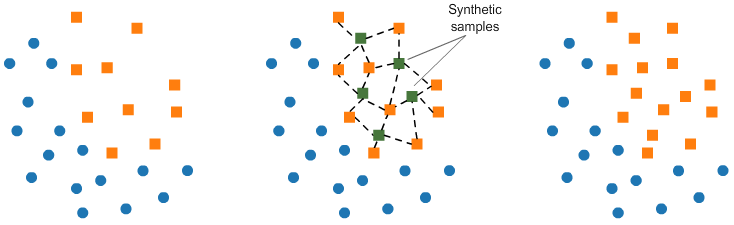

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

df_X_sm = pd.DataFrame(data=X_sm,columns=X.columns)
df_y_sm = pd.DataFrame(data=y_sm,columns=['Loan_Status'])

# Concatenamos la información
df_balanceado_sm = pd.concat([df_X_sm, df_y_sm], axis=1)

In [ ]:
#df_balanceado_sm.head(2)
#df_balanceado_sm.describe()
#df_balanceado_sm.Loan_Status.value_counts()

### Imputación Over-sampling seguido de under-sampling (SMOTE + Tomek links)

Ahora, haremos una combinación de sobremuestreo y submuestreo, usando las técnicas de enlaces SMOTE y Tomek:

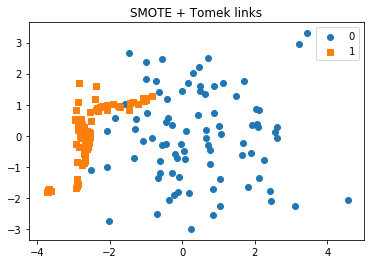

In [37]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

df_X_smt = pd.DataFrame(data=X_smt,columns=X.columns)
df_y_smt = pd.DataFrame(data=y_smt,columns=['Loan_Status'])

# Concatenamos la información
df_balanceado_smt = pd.concat([df_X_smt, df_y_smt], axis=1)

In [ ]:
#df_balanceado_smt.head(3)
#df_balanceado_smt.describe()
#df_balanceado_smt.Loan_Status.value_counts()


## Selección de Drivers

### Selección de Drivers Mediante Técnicas de Machine Learning

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

In [39]:
X_ros.shape

(590, 14)

C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


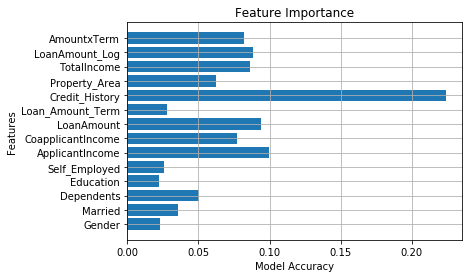

In [42]:
# fit an Extra Tree model to the data
extree = ExtraTreesClassifier()
extree.fit(X_ros, y_ros)

# display the relative importance of each attribute
relval = extree.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(14) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, X.columns)
plt.grid(True)


C:\Users\Andre Chavez\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


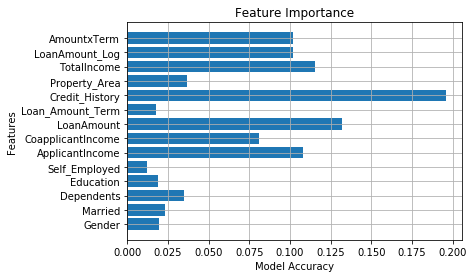

In [44]:
from sklearn.ensemble import RandomForestClassifier as RFC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ajustar un modelo de Machine Learning y verificar las variables más importantes
forest = RFC()
forest.fit(X_ros, y_ros)
importances = forest.feature_importances_

# Creamos un gráfico para visualizar las variables
pos = np.arange(14) + 0.5
plt.barh(pos, importances, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, X.columns)
plt.grid(True)


#### 7 MODELADO DE LA DATA

In [ ]:
# Data Final : df_balanceado_smt pueden elegir cualquiera resultado del producto de un método de balanceo
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# Creación de la data de train, separando o haciendo un split de nuestra información
X_train =df_balanceado_ros.drop('Loan_Status',axis=1)
y_train = df_balanceado_ros['Loan_Status']

In [ ]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

### Redes Neuronales Artificiales

#### Perceptrón Multicapa

In [55]:
from sklearn.neural_network import MLPClassifier
# Parámetros :
# hidden_layer_sizes=(5, 2) i-neurona elemento en la i-esima capa oculta
# activation : Función de activacion , {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
# solver : {‘lbfgs’, ‘sgd’, ‘adam’}, por defecto ‘adam’, método de optimización para los pesos
# alpha : por defecto 0.0001, término de regularización
# random_state : semilla aleatoria

RN = MLPClassifier(activation='logistic', solver='lbfgs', alpha=0.0001, hidden_layer_sizes=(4, 2), random_state=1)
RN.fit(X_train, y_train)   

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [56]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred = RN.predict(X_test)

In [57]:
# Podemos ver la precisión de mi algoritmo de Red Neuronal
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred))

	Accuracy: 0.686



#### ¿ Es importante estandarizar en algunos algoritmos?

In [ ]:
# Existen múltiples estandarizaciones
# Quantiles = preprocessing.QuantileTransformer(random_state=0) Estandarización por Cuantiles
# X_train_N = preprocessing.normalize(X_train, norm='l2') Estandarización por Normalización
# Binarizacion = preprocessing.Binarizer().fit(X_train) Binarización
# Existen muchas más, Est. Sparsa, Est. Robusta, Est. Funciones o Transformaciones.

In [69]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler  

# Las redes neuronales generalmente requieren una estandarización.

scaler = StandardScaler()  # Llamamos una estandarizacion
scaler.fit(X_train)        # Ajustamos la estandarizacion
X_train2 = scaler.transform(X_train) # Aplicamos en train y test.
X_test2=scaler.transform(X_test)

In [72]:
# Ajustamos otro modelo de RedNeuronal
RN.fit(X_train2, y_train)   

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(4, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [73]:
#Calculamos la clase predicha, para poder evaluar la clasificación
y_pred2 = RN.predict(X_test2)

In [74]:
# Evaluamos la clasificacion.
print("\tAccuracy: %1.3f\n" % accuracy_score(y_test, y_pred2))

	Accuracy: 0.800



In [76]:
# Regresión : neural_network.MLPRegressor